In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/imputedsvr/Imputed_SVR.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Place,sex,Age,height_cm,weight_kg,SMM_kg,BFM_kg,BMI_kgm2,Percent_BF,BMR_kcal,...,FEV1,PEF,MIP_Ave,SAF,HbA1c,DM,Hypertension,Hyperlipidemia,Sleepdisorder,sarcopenia_2
0,0.0,0.0,70.0,149.0,70.00,22.249348,28.609415,31.53,42.0326,1267.393124,...,1.688750,3.892763,32.293500,2.0,5.300000,0.0,0.0,0.0,1.0,0
1,0.0,0.0,81.0,146.5,68.40,18.600000,33.290000,31.90,48.7000,1128.000000,...,1.673829,3.367098,14.860766,3.6,5.900000,1.0,1.0,0.0,0.0,0
2,0.0,1.0,90.0,174.0,67.09,24.600000,21.400000,22.20,31.9000,1356.000000,...,1.634212,2.990113,10.347169,1.8,6.742646,0.0,0.0,0.0,0.0,0
3,0.0,1.0,80.0,159.0,53.90,18.700000,18.390000,21.30,34.2000,1135.000000,...,1.908445,4.337270,42.622185,4.6,5.400000,0.0,1.0,0.0,0.0,0
4,0.0,1.0,84.0,170.0,76.90,27.500000,26.700000,26.60,34.7000,1455.000000,...,1.531453,3.763622,36.348624,2.6,5.400000,0.0,0.0,0.0,0.0,0


In [3]:
# Calculate the correlation of all features with 'sarcopenia_2'
correlation_matrix = data.corr()
target_correlation = correlation_matrix['sarcopenia_2'].sort_values(ascending=False)

# Display the correlation of features with 'sarcopenia_2'
target_correlation


sarcopenia_2    1.000000
SARC_CalF       0.495254
G_HG_R          0.457765
G_HG_L          0.416923
Age             0.361319
                  ...   
SMM_kg         -0.424224
BMR_kcal       -0.426688
CC_cm          -0.500395
weight_kg      -0.537154
ASM            -0.551941
Name: sarcopenia_2, Length: 97, dtype: float64

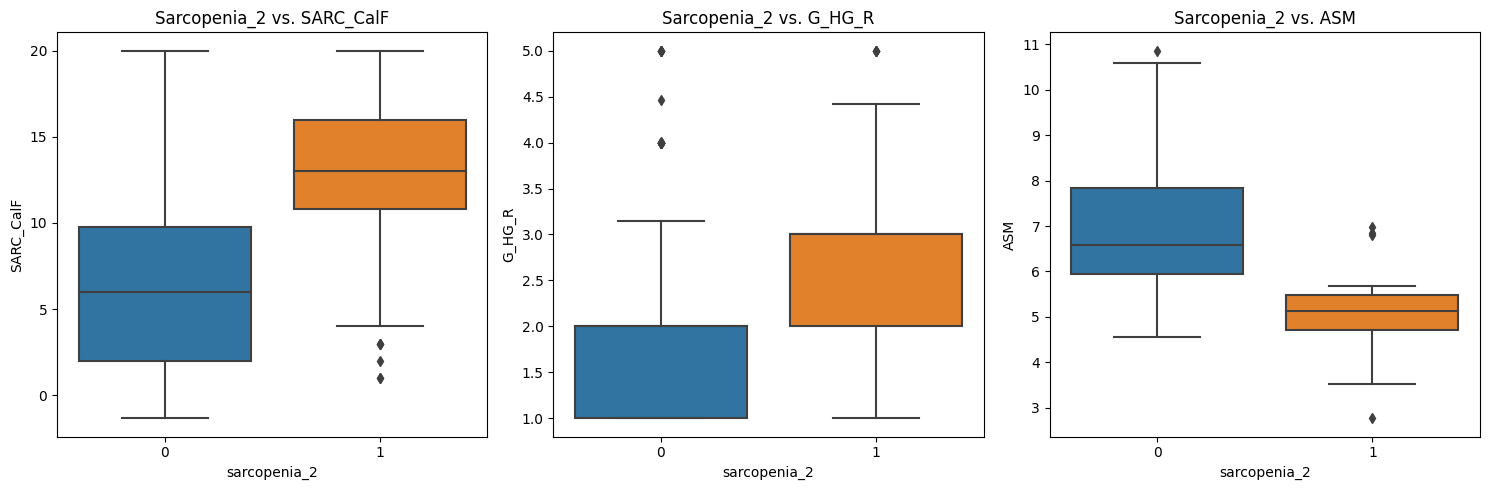

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected features for visualization
selected_features = ['SARC_CalF', 'G_HG_R', 'ASM']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(selected_features), figsize=(15, 5))

# Plot each of the selected features against the target
for i, feature in enumerate(selected_features):
    sns.boxplot(x='sarcopenia_2', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Sarcopenia_2 vs. {feature}')

plt.tight_layout()
plt.show()


In [5]:
# Define a correlation threshold
correlation_threshold = 0.3

# Identify features that meet or exceed the absolute correlation threshold
selected_features_based_on_threshold = target_correlation[abs(target_correlation) > correlation_threshold].index.tolist()

# Exclude the target feature itself from the selection
selected_features_based_on_threshold.remove('sarcopenia_2')

# Number of selected features and their names
num_selected_features = len(selected_features_based_on_threshold)
selected_features_based_on_threshold


['SARC_CalF',
 'G_HG_R',
 'G_HG_L',
 'Age',
 'SS_SPPB',
 'G_TUG',
 'G_SS',
 'G_2MWT',
 'G_D_SLS',
 'SS',
 'MIP_Ave',
 'D_Plantar',
 'Plartar_R_1',
 'FEV1',
 'Plartar_L_1',
 'ND_Plantar',
 'MWT2',
 'ND_Dorsal',
 'height_cm',
 'Dorsal_L_1',
 'PEF',
 'BFM_kg',
 'Dorsal_R_1',
 'D_Dorsal',
 'SPPB',
 'G_BMI',
 'BMI_kgm2',
 'HG_L_1',
 'ND_HG',
 'HG_R_1',
 'HG_L_M',
 'HG_L_2',
 'HG_R_M',
 'HG_R_2',
 'D_HG',
 'SMM_kg',
 'BMR_kcal',
 'CC_cm',
 'weight_kg',
 'ASM']

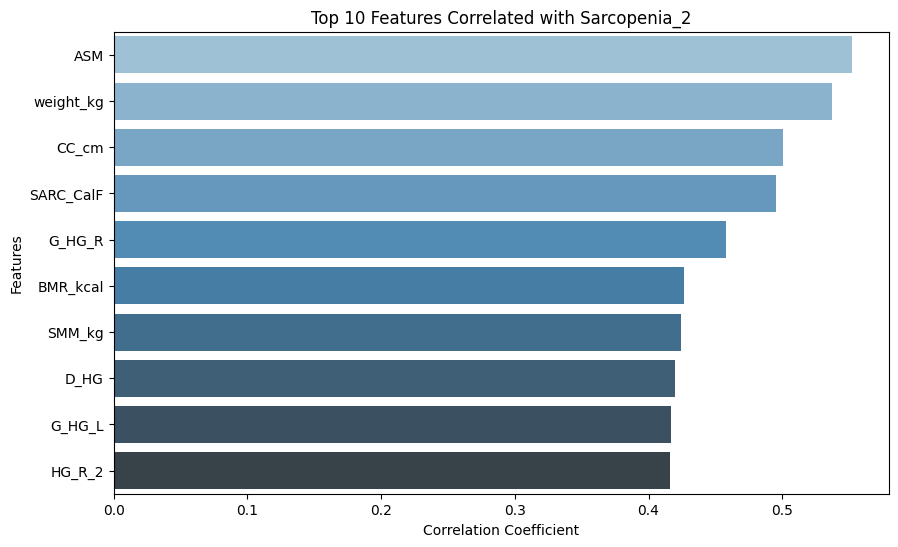

In [6]:
# Select the top 10 features based on absolute correlation value, excluding the target itself
top_10_features = target_correlation.abs().drop('sarcopenia_2').nlargest(10)

# Create a bar chart for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="Blues_d")
plt.title('Top 10 Features Correlated with Sarcopenia_2')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


# SMOTE method

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/kaggle/input/imputedsvr/Imputed_SVR.csv'  # Update this with your file path
data = pd.read_csv(file_path)

# Define features (X) and the target (y)
X = data[['SARC_CalF', 'G_HG_R', 'G_HG_L', 'Age', 'SS_SPPB', 'G_TUG', 'G_SS', 'G_2MWT', 'G_D_SLS', 'SS', 'MIP_Ave', 'D_Plantar', 
        'Plartar_R_1', 'FEV1', 'Plartar_L_1', 'ND_Plantar', 'MWT2', 'ND_Dorsal', 'height_cm', 'Dorsal_L_1', 'PEF', 'BFM_kg', 
        'Dorsal_R_1', 'D_Dorsal', 'SPPB', 'G_BMI', 'BMI_kgm2', 'HG_L_1', 'ND_HG', 'HG_R_1', 'HG_L_M', 'HG_L_2', 'HG_R_M', 'HG_R_2', 
        'D_HG', 'SMM_kg', 'BMR_kcal', 'CC_cm', 'weight_kg', 'ASM']]
y = data['sarcopenia_2']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After applying SMOTE, you can check the class distribution to confirm balancing
print(y_train_smote.value_counts())

# Now, you can proceed with your model training and evaluation using the balanced training set
# and your original test set for evaluation.


sarcopenia_2
0    419
1    419
Name: count, dtype: int64


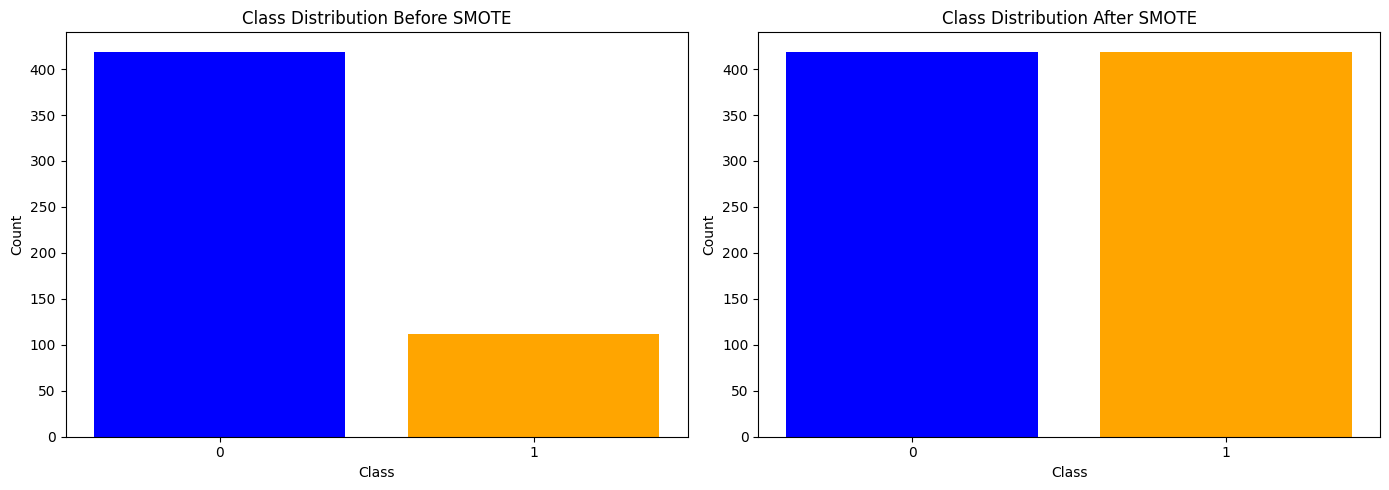

In [8]:
import matplotlib.pyplot as plt

# Class distribution before SMOTE
before_smote_counts = y_train.value_counts()

# Assuming 'y_train_smote' contains the target variable after applying SMOTE
# This part of the code would be executed after applying SMOTE as shown previously
after_smote_counts = y_train_smote.value_counts()

# Setting up the subplot for visualization
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plotting class distribution before SMOTE
axs[0].bar(before_smote_counts.index.astype(str), before_smote_counts.values, color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before SMOTE')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

# Plotting class distribution after SMOTE
axs[1].bar(after_smote_counts.index.astype(str), after_smote_counts.values, color=['blue', 'orange'])
axs[1].set_title('Class Distribution After SMOTE')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Logistic regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy on Test Set:  0.8988095238095238

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        79
           1       0.88      0.94      0.91        89

    accuracy                           0.90       168
   macro avg       0.90      0.90      0.90       168
weighted avg       0.90      0.90      0.90       168



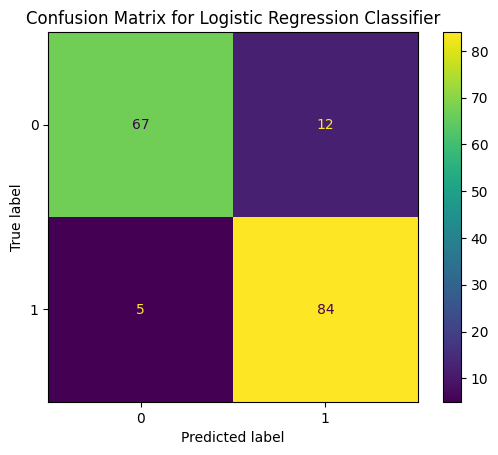

Cross-validation scores: [0.95522388 0.91044776 0.91044776 0.92537313 0.89552239 0.89552239
 0.94029851 0.94029851 0.98507463 0.92537313]
Mean CV accuracy: 0.928358208955224


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Splitting the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the Logistic Regression Classifier
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Conduct k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=kf, scoring='accuracy')

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.savefig('/kaggle/working/LRCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")

# SVR

Accuracy on Test Set:  0.9107142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        79
           1       0.89      0.94      0.92        89

    accuracy                           0.91       168
   macro avg       0.91      0.91      0.91       168
weighted avg       0.91      0.91      0.91       168



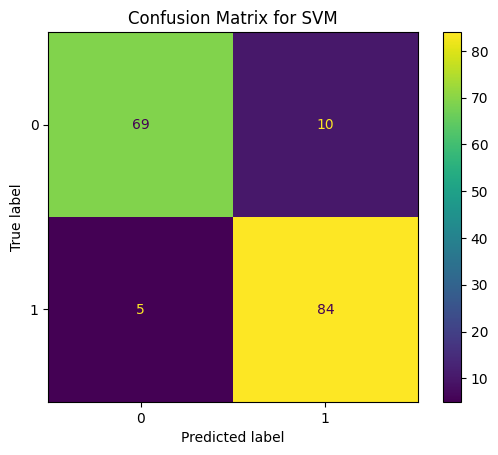

Cross-validation scores: [0.97014925 0.92537313 0.94029851 0.95522388 0.88059701 0.91044776
 0.94029851 0.97014925 0.97014925 0.92537313]
Mean CV accuracy: 0.9388059701492537


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined
# If not, they should be defined similar to previous steps:
# X = df.drop('sarcopenia_2', axis=1)
# y = df['sarcopenia_2']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Conduct k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='accuracy')

# Train the model
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for SVM')
plt.savefig('/kaggle/working/SVMCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")


# Gradient Boosting

Accuracy on Test Set:  0.9821428571428571

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.97      1.00      0.98        89

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



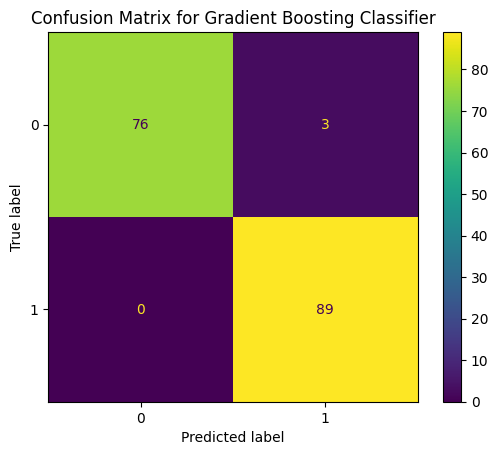

Cross-validation scores: [0.98507463 1.         1.         0.97014925 0.98507463 0.98507463
 0.97014925 0.98507463 0.97014925 0.94029851]
Mean CV accuracy: 0.9791044776119403


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Conduct k-fold cross-validation with 10 folds
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=kf_10, scoring='accuracy')

# Train the model
gb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Plotting the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.savefig('/kaggle/working/GBCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores_gb}")
print(f"Mean CV accuracy: {cv_scores_gb.mean()}")


# RF

Accuracy on Test Set:  0.9642857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.96      0.98      0.97        89

    accuracy                           0.96       168
   macro avg       0.97      0.96      0.96       168
weighted avg       0.96      0.96      0.96       168



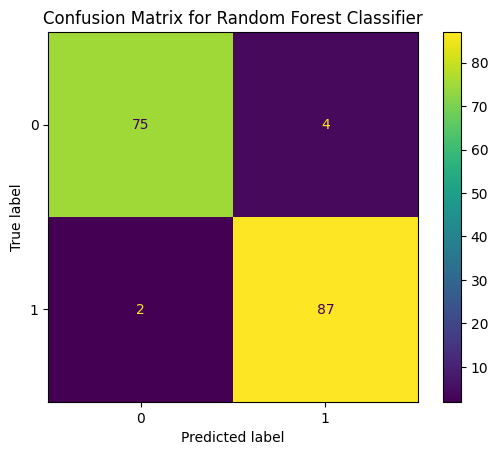

Cross-validation scores: [1.         0.94029851 0.98507463 0.95522388 0.95522388 0.94029851
 1.         0.97014925 0.98507463 0.95522388]
Mean CV accuracy: 0.9686567164179103


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Conduct k-fold cross-validation with 10 folds
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=kf_10, scoring='accuracy')

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Plotting the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.savefig('/kaggle/working/RFCM.png')
plt.show()

# Display cross-validation results
print(f"Cross-validation scores: {cv_scores_rf}")
print(f"Mean CV accuracy: {cv_scores_rf.mean()}")




# DT model

Accuracy on Test Set:  0.9642857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        79
           1       0.95      0.99      0.97        89

    accuracy                           0.96       168
   macro avg       0.97      0.96      0.96       168
weighted avg       0.97      0.96      0.96       168



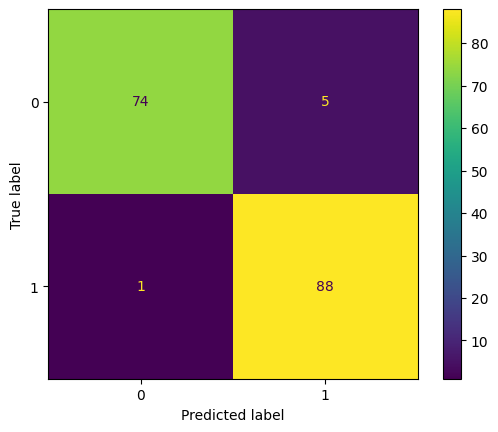

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming X_train_smote and y_train_smote are already defined and represent your balanced dataset

# Splitting the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# LightGBM model

[LightGBM] [Info] Number of positive: 330, number of negative: 340
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8108
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492537 -> initscore=-0.029853
[LightGBM] [Info] Start training from score -0.029853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

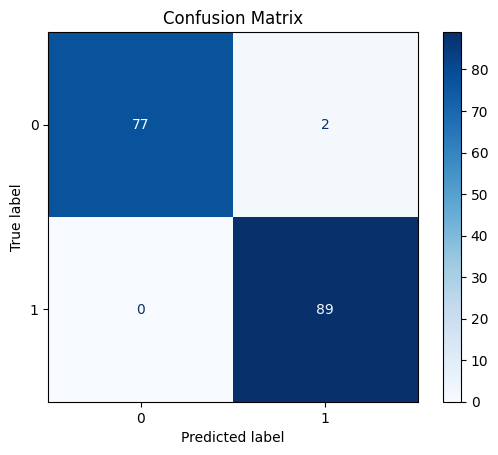

In [14]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_smote and y_train_smote are already defined and represent your balanced dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the LightGBM Classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Train the model
lgbm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map by altering the cmap parameter
plt.title('Confusion Matrix')
plt.show()


# CatBoost model

Accuracy on Test Set:  0.9821428571428571

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.97      1.00      0.98        89

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



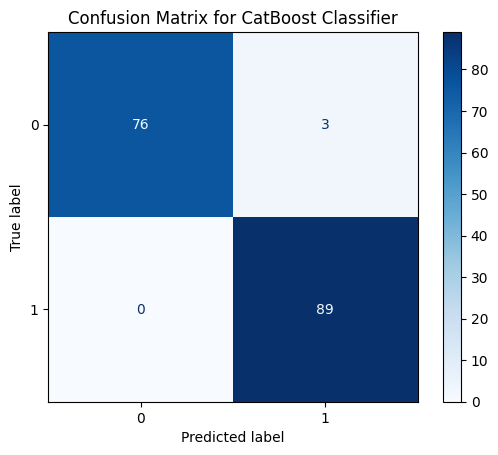

In [15]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_smote and y_train_smote are already defined and represent your balanced dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the CatBoost Classifier
# Note: CatBoost outputs training logs by default, which can be disabled by setting verbose=0
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Train the model
catboost_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map by altering the cmap parameter
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()


# Random forest

Accuracy on Test Set:  0.9642857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.96      0.98      0.97        89

    accuracy                           0.96       168
   macro avg       0.97      0.96      0.96       168
weighted avg       0.96      0.96      0.96       168



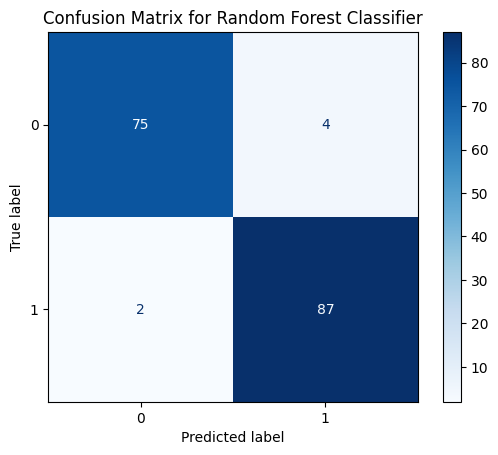

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_smote and y_train_smote are already defined and represent your balanced dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map by altering the cmap parameter
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
